In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
placed_check = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-deep-learning/main/day3/placement.csv')
placed_check.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
placed = placed_check[placed_check['placed']==1]
placed

,cgpa,resume_score,placed
0,8.14,6.52,1
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
5,8.77,6.19,1
9,7.69,7.12,1
13,8.50,5.09,1
14,7.51,6.25,1
15,8.88,5.93,1
16,8.04,7.64,1


In [4]:
not_placed = placed_check[placed_check['placed']==0]
not_placed

,cgpa,resume_score,placed
1,6.17,5.17,0
6,5.34,7.09,0
7,6.56,6.29,0
8,6.32,6.71,0
10,6.18,6.35,0
11,5.44,6.54,0
12,6.09,7.01,0
18,5.94,5.88,0
20,5.80,8.06,0
21,6.53,7.64,0


In [5]:
x_placed = list(placed.iloc[:,0])
x_placed

[8.14,
 8.27,
 6.88,
 7.52,
 8.77,
 7.69,
 8.5,
 7.51,
 8.88,
 8.04,
 7.81,
 6.75,
 8.22,
 7.76,
 7.46,
 7.36,
 8.43,
 8.87,
 8.07,
 8.16,
 9.05,
 7.5,
 8.25,
 8.68,
 6.9,
 8.21,
 8.1,
 7.05,
 8.22,
 6.94,
 6.89,
 8.65,
 7.93,
 8.35,
 6.59,
 8.06,
 7.12,
 7.34,
 7.63,
 6.34,
 9.4,
 7.83,
 7.92,
 7.6,
 8.07,
 8.28,
 9.31,
 8.01,
 8.23,
 8.14]

In [6]:
y_placed = placed.iloc[:,1]
y_placed

0     6.52
2     8.86
3     7.27
4     7.30
5     6.19
9     7.12
13    5.09
14    6.25
15    5.93
16    7.64
17    8.71
19    8.11
24    6.18
25    5.68
28    7.67
30    7.15
33    7.73
34    7.19
35    7.48
36    7.56
37    8.21
39    6.19
40    5.32
41    5.15
42    6.91
43    7.95
45    5.44
47    8.14
50    6.74
55    6.87
61    7.96
63    7.58
64    8.09
66    8.02
67    6.81
69    9.06
70    7.41
71    8.22
72    7.98
75    7.94
76    5.50
80    7.70
82    6.06
83    8.08
88    6.07
91    6.30
93    7.39
94    4.95
96    7.76
98    5.63
Name: resume_score, dtype: float64

In [7]:
x_not_placed = not_placed.iloc[:,0]
x_not_placed

1     6.17
6     5.34
7     6.56
8     6.32
10    6.18
11    5.44
12    6.09
18    5.94
20    5.80
21    6.53
22    6.16
23    6.05
26    6.27
27    5.51
29    6.19
31    5.92
32    5.87
38    6.00
44    5.47
46    5.83
48    5.54
49    5.46
51    6.54
52    5.90
53    6.00
54    5.92
56    6.13
57    6.34
58    6.47
59    5.95
60    5.87
62    5.75
65    6.04
68    6.01
73    5.76
74    5.54
77    5.88
78    5.79
79    5.27
81    6.12
84    5.76
85    6.72
86    6.18
87    5.62
89    5.99
90    5.85
92    5.43
95    6.33
97    6.65
99    6.09
Name: cgpa, dtype: float64

In [8]:
y_not_placed = not_placed.iloc[:,1]
y_not_placed

1     5.17
6     7.09
7     6.29
8     6.71
10    6.35
11    6.54
12    7.01
18    5.88
20    8.06
21    7.64
22    5.77
23    7.13
26    6.47
27    6.15
29    7.30
31    7.02
32    7.96
38    8.72
44    5.92
46    5.21
48    6.57
49    6.73
51    7.39
52    7.50
53    7.16
54    7.18
56    6.43
57    7.21
58    7.37
59    7.57
60    6.64
62    8.43
65    8.75
68    7.49
73    6.48
74    7.36
77    6.92
78    5.66
79    7.28
81    6.72
84    6.49
85    5.46
86    5.76
87    5.05
89    7.49
90    5.56
92    6.18
95    6.38
97    7.78
99    6.61
Name: resume_score, dtype: float64

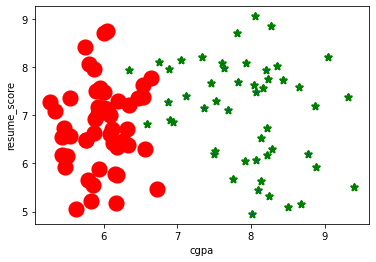

In [9]:
plt.scatter(x_placed, y_placed, c ="blue", 
            linewidths = 2, 
            marker ="*", 
            edgecolor ="green", 
            s = 50)
 
plt.scatter(x_not_placed, y_not_placed, c ='red',
            linewidths = 2,
            marker ="o", 
            edgecolor ="red", 
            s = 200)
 
plt.xlabel("cgpa")
plt.ylabel("resume_score")
plt.show()

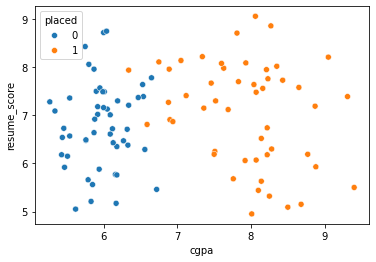

In [10]:
sns.scatterplot(data=placed_check, x='cgpa', y='resume_score', hue='placed')
plt.show()

In [11]:
X = placed_check.iloc[:,:2]
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [12]:
y = placed_check.iloc[:,-1]
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [13]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [14]:
p.fit(X,y)

Perceptron()

In [15]:
p.coef_

array([[ 40.26, -36.  ]])

In [16]:
p.intercept_

array([-25.])

/home/hitesh/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


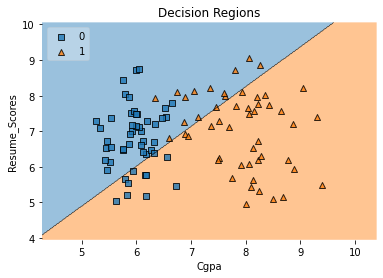

In [17]:


# Assuming you have a trained classifier 'clf' and feature data 'X' and target labels 'y'

plot_decision_regions(X.values, y.values, clf=p, legend=2)

plt.xlabel('Cgpa')
plt.ylabel('Resume_Scores')
plt.title('Decision Regions')
plt.show()